# Histogram Backprojection on Grayscale

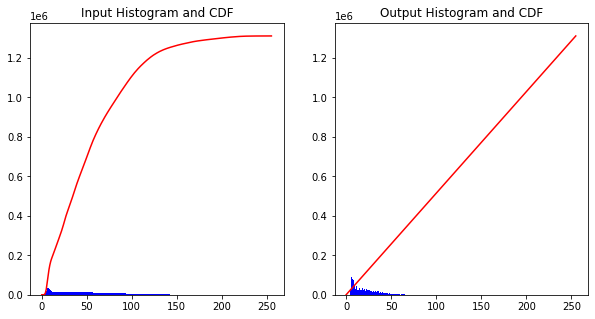

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



def modify_cdf(path, desired_cdf):
    """
    User defined function to modify the cdf of an image based on backpropagation
    from a specified lookup table of desired cdf
    
    Parameters:
    path (int): specify the path of an input image
    desired_cdf (numpy.ndarray): numpy array of a desired cdf
    
    Author:
    Lyle Kenneth Geraldez
    """
    # Load the input grayscale image
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # Compute the input CDF
    hist, bins = np.histogram(img.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()

    # Compute the mapping function using backpropagation
    mapping = np.interp(desired_cdf, cdf_normalized, bins[:-1])
    mapped_img = np.interp(img.flatten(), bins[:-1], mapping).astype(np.uint8)
    mapped_img = mapped_img.reshape(img.shape)

    # Plot the input and output histograms
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].hist(img.flatten(), 256, [0, 256], color='blue')
    ax[0].plot(cdf_normalized * img.size, color='red')
    ax[0].set_title('Input Histogram and CDF')

    ax[1].hist(mapped_img.flatten(), 256, [0, 256], color='blue')
    ax[1].plot(desired_cdf * img.size, color='red')
    ax[1].set_title('Output Histogram and CDF')

    # Show the images
    plt.show()

    # Save the output image
    cv2.imwrite('modified_cdf.jpg', mapped_img)

    
modify_cdf('dark_whirlpool.jpg', np.linspace(0, 1, 256))

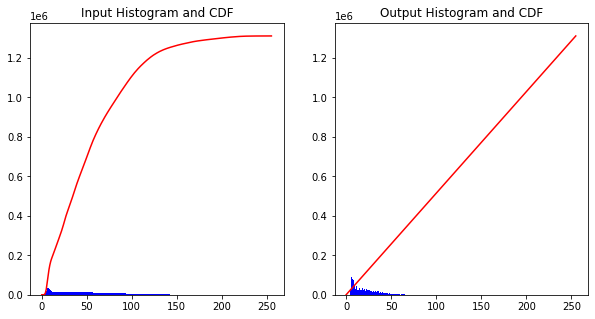

True

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input grayscale image
img = cv2.imread('dark_whirlpool.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the input CDF
hist, bins = np.histogram(img.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

# Define the desired CDF
desired_cdf = np.linspace(0, 1, 256)

# Compute the mapping function using backpropagation
mapping = np.interp(desired_cdf, cdf_normalized, bins[:-1])
mapped_img = np.interp(img.flatten(), bins[:-1], mapping).astype(np.uint8)
mapped_img = mapped_img.reshape(img.shape)

# Plot the input and output histograms
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(img.flatten(), 256, [0, 256], color='blue')
ax[0].plot(cdf_normalized * img.size, color='red')
ax[0].set_title('Input Histogram and CDF')

ax[1].hist(mapped_img.flatten(), 256, [0, 256], color='blue')
ax[1].plot(desired_cdf * img.size, color='red')
ax[1].set_title('Output Histogram and CDF')

# Show the images
plt.show()

# Save the output image
cv2.imwrite('galaxy_linear_cdf.jpg', mapped_img)


<class 'numpy.ndarray'>


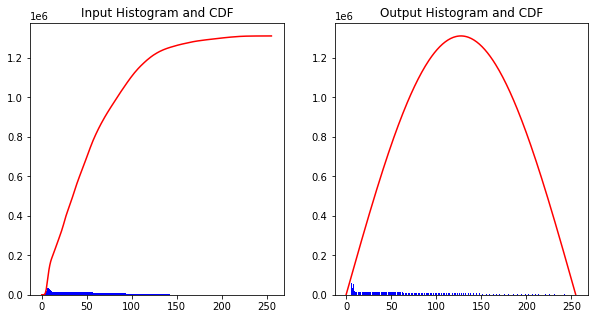

In [9]:
x = np.linspace(0, np.pi, 256)
desired_cdf = np.sin(x)
print(type(desired_cdf))
modify_cdf('dark_whirlpool.jpg', desired_cdf)

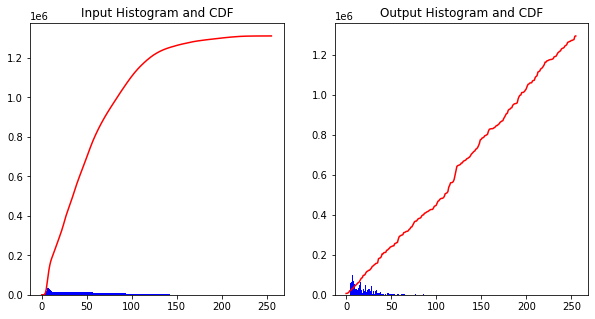

True

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input grayscale image
# img = cv2.imread('dark_galaxy.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('dark_whirlpool.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the input CDF
hist, bins = np.histogram(img.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

# Define the desired CDF
np.random.seed(42)
desired_cdf = np.sort(np.random.rand(256))

# Compute the mapping function using backpropagation
mapping = np.interp(desired_cdf, cdf_normalized, bins[:-1])
mapped_img = np.interp(img.flatten(), bins[:-1], mapping).astype(np.uint8)
mapped_img = mapped_img.reshape(img.shape)

# Plot the input and output histograms
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(img.flatten(), 256, [0, 256], color='blue')
ax[0].plot(cdf_normalized * img.size, color='red')
ax[0].set_title('Input Histogram and CDF')

ax[1].hist(mapped_img.flatten(), 256, [0, 256], color='blue')
ax[1].plot(desired_cdf * img.size, color='red')
ax[1].set_title('Output Histogram and CDF')

# Show the images
plt.show()

# Save the output image
cv2.imwrite('galaxy_random_cdf.jpg', mapped_img)


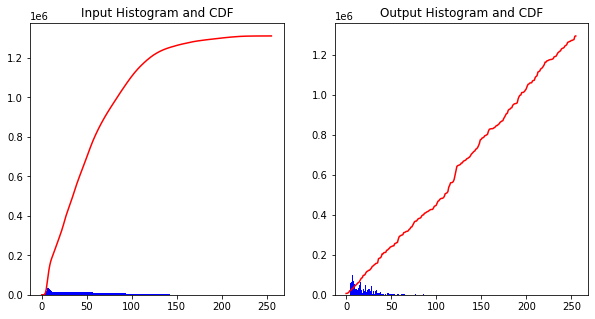

In [4]:
np.random.seed(42)
desired_cdf = np.sort(np.random.rand(256))
modify_cdf('dark_whirlpool.jpg', desired_cdf)

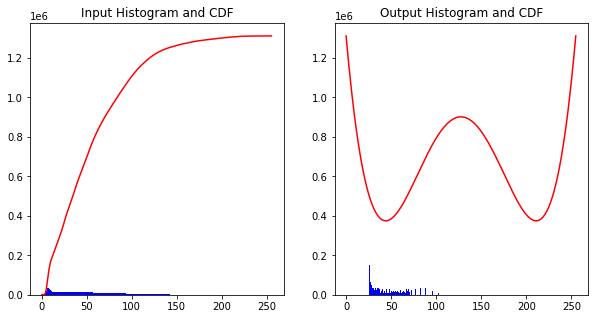

True

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

# Load the input grayscale image
# img = cv2.imread('dark_galaxy.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('dark_whirlpool.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the input CDF
hist, bins = np.histogram(img.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

# Define the desired CDF
x = np.linspace(-1, 1, 256)
p = legendre(4)(x)
desired_cdf = 0.5 * (1 + p)

# Compute the mapping function using backpropagation
mapping = np.interp(desired_cdf, cdf_normalized, bins[:-1])
mapped_img = np.interp(img.flatten(), bins[:-1], mapping).astype(np.uint8)
mapped_img = mapped_img.reshape(img.shape)

# Plot the input and output histograms
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(img.flatten(), 256, [0, 256], color='blue')
ax[0].plot(cdf_normalized * img.size, color='red')
ax[0].set_title('Input Histogram and CDF')

ax[1].hist(mapped_img.flatten(), 256, [0, 256], color='blue')
ax[1].plot(desired_cdf * img.size, color='red')
ax[1].set_title('Output Histogram and CDF')

# Show the images
plt.show()

# Save the output image
cv2.imwrite('galaxy_legendre_cdf.jpg', mapped_img)


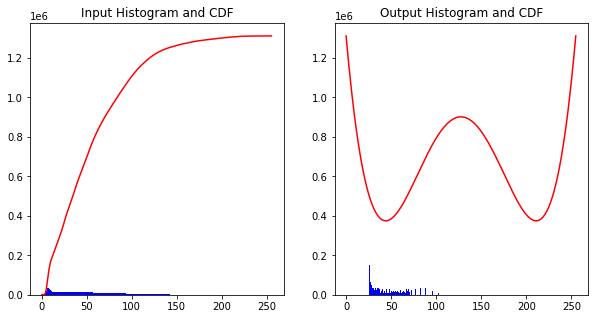

In [6]:
from scipy.special import legendre
x = np.linspace(-1, 1, 256)
p = legendre(4)(x)
desired_cdf = 0.5 * (1 + p)
modify_cdf('dark_whirlpool.jpg', desired_cdf)

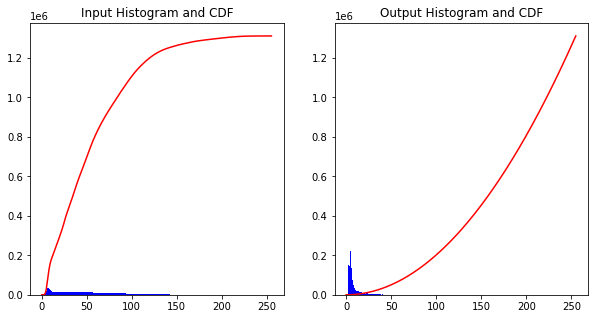

True

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input grayscale image
# img = cv2.imread('dark_galaxy.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('dark_whirlpool.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the input CDF
hist, bins = np.histogram(img.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

# Define the desired CDF
x = np.linspace(0, 1, 256)
desired_cdf = x ** 2

# Compute the mapping function using backpropagation
mapping = np.interp(desired_cdf, cdf_normalized, bins[:-1])
mapped_img = np.interp(img.flatten(), bins[:-1], mapping).astype(np.uint8)
mapped_img = mapped_img.reshape(img.shape)

# Plot the input and output histograms
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(img.flatten(), 256, [0, 256], color='blue')
ax[0].plot(cdf_normalized * img.size, color='red')
ax[0].set_title('Input Histogram and CDF')

ax[1].hist(mapped_img.flatten(), 256, [0, 256], color='blue')
ax[1].plot(desired_cdf * img.size, color='red')
ax[1].set_title('Output Histogram and CDF')

# Show the images
plt.show()

# Save the output image
cv2.imwrite('galaxy_contrast_cdf.jpg', mapped_img)


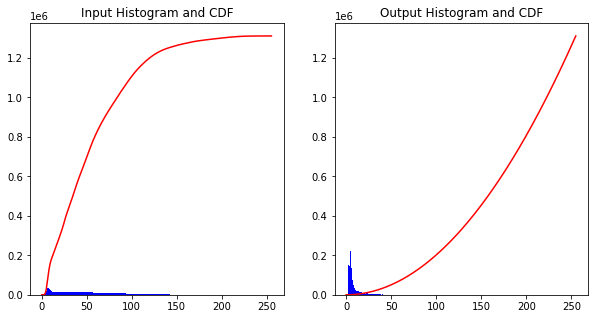

In [7]:
x = np.linspace(0, 1, 256)
desired_cdf = x ** 2
modify_cdf('dark_whirlpool.jpg', desired_cdf)

In [21]:
# img = cv2.imread('dark_galaxy.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('dark_whirlpool.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('grayscale_galaxy.jpg', img)



True